In [1]:
# library imports
import csv
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# import NDP file (~3GB of plain text)
ndp_file = "../../227-www-ndp-ca.txt"

In [7]:
# load the NDP plain text as a dataframe
df = pd.read_csv(ndp_file, sep = ",", usecols=[0,1,2,3], header=None, error_bad_lines=False, quoting=csv.QUOTE_NONE)
df = df.sort_values(0)

In [10]:
# let's focus just on the homepage
# find a homepage to focus on for the diffs
homepages = df.loc[df[2].isin(["http://www.ndp.ca/","https://www.ndp.ca/"])]
print(len(homepages))



101


In [11]:
## Trying to go one page deeper than homepage -- having problems with dataframes
# find all links that begin with "http://www.ndp.ca/"
subset_mask = df[2].str[:18] == "http://www.ndp.ca/"
subset = df.loc[subset_mask]
# df[2] = df[2].str[:18] # not sure which number
# print(df[2].unique())

# reduce data to those within 2 pages of homepage
nextpage_mask = subset[2].str.len() > 18
slash_mask = (subset[2].str.count('/') <= 4)
subset = subset.loc[nextpage_mask]
subset = subset.loc[slash_mask]

# add slashes to data
for i in range(len(subset[2])):
    string = subset.loc[subset.index[i], 2]
    print(string)
    final_char = string[len(string)-1]
    if final_char != '/':
        subset[2][i] = string + '/'
    else:
        subset[2][i] = string

slash_mask2 = (subset[2].str.count('/') == 4)
subset = subset.loc[slash_mask2]
print(subset)

#lngth = []
#for i in range(len(df[2])):
#    locations = [pos for pos, char in enumerate(df[2][i]) if char == '/']
#    lngth.append(len(locations))
# print(lngth)

#nextpages = df.loc[lngth == 3]

#nextpages = df.loc[len(locations) == 4]

http://www.ndp.ca/page/3187
http://www.ndp.ca/headlines?from=0&limit=10
http://www.ndp.ca/page/3296
http://www.ndp.ca/page/3309
http://www.ndp.ca/page/3280
http://www.ndp.ca/page/3219
http://www.ndp.ca/page/3223
http://www.ndp.ca/page/3231
http://www.ndp.ca/page/3267
http://www.ndp.ca/page/3274
http://www.ndp.ca/page/3264
http://www.ndp.ca/headlines?from=110&limit=10
http://www.ndp.ca/page/2588
http://www.ndp.ca/page/2610
http://www.ndp.ca/page/3458
http://www.ndp.ca/headlines?from=60&limit=10
http://www.ndp.ca/page/3456
http://www.ndp.ca/pressreleases
http://www.ndp.ca/headlines?from=70&limit=10
http://www.ndp.ca/headlines?from=20&limit=10
http://www.ndp.ca/page/3461
http://www.ndp.ca/backgrounders
http://www.ndp.ca/ndp-drupal/headlines3.php
http://www.ndp.ca/ourrecord
http://www.ndp.ca/ourhistory
http://www.ndp.ca/formerliberals
http://www.ndp.ca/books
http://www.ndp.ca/questionperiod
http://www.ndp.ca/whattheyresaying
http://www.ndp.ca/headlines?from=30&limit=10
http://www.ndp.ca/he

http://www.ndp.ca/page/2370
http://www.ndp.ca/page/2514
http://www.ndp.ca/page/2526
http://www.ndp.ca/page/2361
http://www.ndp.ca/page/3433
http://www.ndp.ca/rapidresponse?from=20&limit=10
http://www.ndp.ca/page/3439
http://www.ndp.ca/books/
http://www.ndp.ca/endp-subscribe/
http://www.ndp.ca/page/3480
http://www.ndp.ca/rapidresponse
http://www.ndp.ca/statements
http://www.ndp.ca/headlines?from=40&limit=10
http://www.ndp.ca/page/3464
http://www.ndp.ca/headlines?from=80&limit=10
http://www.ndp.ca/speechesandarticles
http://www.ndp.ca/page/3463
http://www.ndp.ca/headlines?from=430&limit=10
http://www.ndp.ca/bio/
http://www.ndp.ca/rapidresponse?from=70&limit=10
http://www.ndp.ca/rapidresponse?from=130&limit=10
http://www.ndp.ca/rapidresponse?from=40&limit=10
http://www.ndp.ca/page/3442
http://www.ndp.ca/page/3470
http://www.ndp.ca/page/1412
http://www.ndp.ca/resources
http://www.ndp.ca/speechesandarticles/
http://www.ndp.ca/officialphotos/
http://www.ndp.ca/convention/
http://www.ndp.ca/m

http://www.ndp.ca/page/160
http://www.ndp.ca/page/161
http://www.ndp.ca/page/150
http://www.ndp.ca/page/162
http://www.ndp.ca/page/167
http://www.ndp.ca/page/145
http://www.ndp.ca/page/155
http://www.ndp.ca/page/144
http://www.ndp.ca/page/148
http://www.ndp.ca/page/157
http://www.ndp.ca/page/147
http://www.ndp.ca/page/156
http://www.ndp.ca/page/166
http://www.ndp.ca/drummond@npd.qc.ca
http://www.ndp.ca/page/248
http://www.ndp.ca/page/169
http://www.ndp.ca/page/1894
http://www.ndp.ca/page/1416
http://www.ndp.ca/pressreleases?from=250&limit=10
http://www.ndp.ca/page/939
http://www.ndp.ca/pressreleases?from=260&limit=10
http://www.ndp.ca/pressreleases?from=300&limit=10
http://www.ndp.ca/page/941
http://www.ndp.ca/page/937
http://www.ndp.ca/pressreleases?from=280&limit=10
http://www.ndp.ca/pressreleases?from=290&limit=10
http://www.ndp.ca/pressreleases?from=320&limit=10
http://www.ndp.ca/page/2442
http://www.ndp.ca/page/2485
http://www.ndp.ca/page/2434
http://www.ndp.ca/page/2468
http://ww

http://www.ndp.ca/page/1627
http://www.ndp.ca/page/1623
http://www.ndp.ca/page/1453
http://www.ndp.ca/page/1410
http://www.ndp.ca/page/1440
http://www.ndp.ca/page/1619
http://www.ndp.ca/page/1423
http://www.ndp.ca/page/1394
http://www.ndp.ca/page/1370
http://www.ndp.ca/page/1309
http://www.ndp.ca/page/1321
http://www.ndp.ca/page/1311
http://www.ndp.ca/page/1319
http://www.ndp.ca/page/1317
http://www.ndp.ca/page/1315
http://www.ndp.ca/page/1313
http://www.ndp.ca/page/1325
http://www.ndp.ca/page/1725
http://www.ndp.ca/page/987
http://www.ndp.ca/page/995
http://www.ndp.ca/page/977
http://www.ndp.ca/page/989
http://www.ndp.ca/page/969
http://www.ndp.ca/page/963
http://www.ndp.ca/page/975
http://www.ndp.ca/page/961
http://www.ndp.ca/page/973
http://www.ndp.ca/page/971
http://www.ndp.ca/page/957
http://www.ndp.ca/page/967
http://www.ndp.ca/page/959
http://www.ndp.ca/page/951
http://www.ndp.ca/page/947
http://www.ndp.ca/page/955
http://www.ndp.ca/page/949
http://www.ndp.ca/page/965
http://www

http://www.ndp.ca/page/214
http://www.ndp.ca/page/218
http://www.ndp.ca/page/183
http://www.ndp.ca/joannfennessey
http://www.ndp.ca/page/185
http://www.ndp.ca/page/188
http://www.ndp.ca/brucerogers
http://www.ndp.ca/janicehagan
http://www.ndp.ca/page/199
http://www.ndp.ca/tarasnatyshak
http://www.ndp.ca/page/176
http://www.ndp.ca/page/205
http://www.ndp.ca/page/190
http://www.ndp.ca/page/179
http://www.ndp.ca/page/193
http://www.ndp.ca/page/177
http://www.ndp.ca/page/172
http://www.ndp.ca/page/181
http://www.ndp.ca/page/217
http://www.ndp.ca/page/173
http://www.ndp.ca/page/208
http://www.ndp.ca/page/204
http://www.ndp.ca/page/211
http://www.ndp.ca/page/213
http://www.ndp.ca/page/207
http://www.ndp.ca/page/200
http://www.ndp.ca/page/174
http://www.ndp.ca/page/187
http://www.ndp.ca/page/180
http://www.ndp.ca/ridings/ontario?from=50&limit=50
http://www.ndp.ca/page/197
http://www.ndp.ca/page/192
http://www.ndp.ca/page/198
http://www.ndp.ca/page/206
http://www.ndp.ca/page/210
http://www.ndp

KeyboardInterrupt: 

In [5]:
# let's begin by comparing texts
# we can load the SequenceMatcher library

from difflib import SequenceMatcher
lists = [ [] for _ in range(4) ]
labels = []

In [6]:
print(homepages.iloc[0][3])

NDP | The New Democratic Party of Canada ABOUT › Jack Layton › Our Caucus › Our History › Contact Us GET INVOLVED › Your Riding › Campaigns › Events › Youth RESOURCES › Press Room › Speeches & Articles › Downloads › e.NDP › More... SEARCH › Français  › NDP Budget Details › Jack's Budget Speech › Quotes on NDP Budget › Session in Review Privacy Policy | Jobs | RSS © 2005 New Democratic Party


In [7]:
# byte-wise metric
# compares two pages character by character
# returns 1 if there is any change at all between two pages

bytewise = []
for y in range(len(homepages)-1):
    first_page = "".join(homepages.iloc[y].tolist()) # convert webpage text into one long string
    second_page = "".join(homepages.iloc[y+1].tolist()) 
    if len(first_page) == len(second_page):
        for k in range(len(first_page)):
            if first_page[k] != second_page[k]:
                bytewise.append(1)
                break   
            elif (k == len(first_page) - 1) and (first_page[k] == second_page[k]):
                bytewise.append(0)
    else:
        bytewise.append(1)

# output is the list of metric values: either 0 (no change) or 1 (any change)
# print(bytewise)
lists[0] = bytewise
labels.append('byte-wise')

In [8]:
# TF.IDF metric
# compares the occurrence of chosen words in each page
# generates vectors weighted by such occurrences and calculates cosine distance between them

import re
import random
import numpy as np
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

tfidf = []
for y in range(len(homepages)-1):
    first_page = re.sub("[^\w]", " ",  "".join(homepages.iloc[y].tolist())).split()
    print('before =', first_page)
    first_page_new = [word for word in first_page if word not in stop_words]
    print('after =', first_page_new)
    second_page = re.sub("[^\w]", " ",  "".join(homepages.iloc[y+1].tolist())).split()
    second_page = [word for word in second_page if word not in stop_words]

    # generate random list of words of length >= 5 that appear in first page
    random_words = []
    for i in range(10):
        rand = random.choice(first_page)
        while len(rand) <= 4:
            rand = random.choice(first_page)    
        random_words.append(rand)
    print(random_words)
    
    # count how many times random words appear in each page
    v1 = []
    v2 = []
    for j in range(len(random_words)):
        v1.append(first_page.count(random_words[j]))
        v2.append(second_page.count(random_words[j]))
    
    if np.linalg.norm(v2) == 0:
        D = 1
    else:
        D = 1 - np.inner(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    tfidf.append(D)

# output is the list of metric values between 0 (very similar) and 1 (very different)
# print(tfidf)
lists[1] = tfidf
labels.append('TF.IDF')

before = ['20051007www', 'ndp', 'cahttp', 'www', 'ndp', 'ca', 'NDP', 'The', 'New', 'Democratic', 'Party', 'of', 'Canada', 'ABOUT', 'Jack', 'Layton', 'Our', 'Caucus', 'Our', 'History', 'Contact', 'Us', 'GET', 'INVOLVED', 'Your', 'Riding', 'Campaigns', 'Events', 'Youth', 'RESOURCES', 'Press', 'Room', 'Speeches', 'Articles', 'Downloads', 'e', 'NDP', 'More', 'SEARCH', 'Français', 'NDP', 'Budget', 'Details', 'Jack', 's', 'Budget', 'Speech', 'Quotes', 'on', 'NDP', 'Budget', 'Session', 'in', 'Review', 'Privacy', 'Policy', 'Jobs', 'RSS', '2005', 'New', 'Democratic', 'Party']
after = ['20051007www', 'ndp', 'cahttp', 'www', 'ndp', 'ca', 'NDP', 'The', 'New', 'Democratic', 'Party', 'Canada', 'ABOUT', 'Jack', 'Layton', 'Our', 'Caucus', 'Our', 'History', 'Contact', 'Us', 'GET', 'INVOLVED', 'Your', 'Riding', 'Campaigns', 'Events', 'Youth', 'RESOURCES', 'Press', 'Room', 'Speeches', 'Articles', 'Downloads', 'e', 'NDP', 'More', 'SEARCH', 'Français', 'NDP', 'Budget', 'Details', 'Jack', 'Budget', 'Speech'

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/caoimherooney/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
# edit distances metric
# number of edits that are required to transform one sentence into another.
# we normalise this number by the total number of characters in each of the two pages 
# ie deleting all of page 1 and adding all of page 2

edit_distances = []
for y in range(len(homepages)-1):
    first_page = "".join(homepages.iloc[y].tolist()) # convert webpage text into one long string
    second_page = "".join(homepages.iloc[y+1].tolist()) 
    len_first = len(first_page)
    len_second = len(second_page)
    
    distance = nltk.edit_distance(first_page, second_page, transpositions=False)
    edit_distances.append(distance / (len_first + len_second))

# output is the list of metric values between 0 (very similar) and 1 (very different)
# print(edit_distances)
lists[2] = edit_distances
labels.append('edit distances')

In [33]:
# word distance metric 
# calculates how many of the words on a page have changed
# split option allows us to consider if splitting the strings into words makes a difference

word_distance = []
word_distance_split = []
for y in range (0,len(homepages)-1):
    first_page = homepages.iloc[y].tolist()
    second_page = homepages.iloc[y+1].tolist()
    seq = SequenceMatcher(None, first_page[3],second_page[3])
    seq_split = SequenceMatcher(None, first_page[3].split(),second_page[3].split())
    distance = 1-seq.ratio()
    distance_split = 1-seq_split.ratio()
    word_distance.append(distance)
    word_distance_split.append(distance_split)
    
# output is the list of metric values between 0 (very similar) and 1 (very different)
# print(word_distance)
# print(word_distance_split)
lists[3] = word_distance
#lists[4] = word_distance_split
labels.append('word distances')
#labels.append('word distances split')

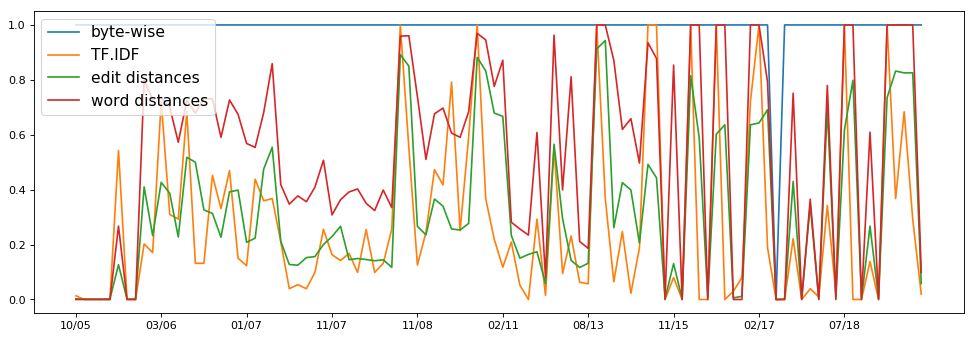

In [34]:
times = homepages[0].unique()
N = 10

plt.figure(figsize = (15,5), dpi = 80, facecolor = 'w', edgecolor = 'k')
for j in range(len(lists)):
    my_xticks = []
    for i in range (0,len(times)-1,N):
        my_xticks.append(str(times[i][5:7] + "/" + times[i][3:5]));
    plt.plot(lists[j], label = labels[j]);
    plt.xticks(range(0,len(times)-1,N), my_xticks);
    plt.legend(loc = "upper left", fontsize = 14)